In [29]:
# Polynomial Regression
# comparing Linear Regression and Polynomial Regression models for predicting salary based on position level.
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
# Importing the dataset
dataset = pd.read_csv(r"C:\Users\user\Position_Salaries.csv")

In [42]:
D = dataset.iloc[:, :].values
print(D)
# Position	, Level , 	Salary

[['Business Analyst' 1 45000]
 ['Junior Consultant' 2 50000]
 ['Senior Consultant' 3 60000]
 ['Manager' 4 80000]
 ['Country Manager' 5 110000]
 ['Region Manager' 6 150000]
 ['Partner' 7 200000]
 ['Senior Partner' 8 300000]
 ['C-level' 9 500000]
 ['CEO' 10 1000000]]


In [46]:
X = dataset.iloc[:, 1:-1].values
# level
# :: Selects all rows.
# 1:-1: Refers to the columns starting from index 1 up to, but not including, the last column (-1).
# In this dataset:
# Column index 0: "Position" (not included)
# Column index 1: "Level" (included)
# Column index 2: "Salary" (excluded)
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [47]:
y = dataset.iloc[:, -1].values
print(y)
# salary

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [34]:
# Training the Linear Regression model on the whole dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [48]:
# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
# Specifies the degree of the polynomial we want to fit. In this case, it's a 4th-degree polynomial.

X_poly = poly_reg.fit_transform(X)
# PolynomialFeatures(degree=4): Converts the independent variable (X=level) into a polynomial feature set of degree 4.Example: For X=[1,2,3], X poly will contain [1,𝑥,𝑥2, 𝑥3, 𝑥4]
# If X(Level) is:[[1], [2], [3]]Then 𝑋poly becomes:
# [[1, 1, 1^2, 1^3, 1^4],
#  [1, 2, 2^2, 2^3, 2^4],
#  [1, 3, 3^2, 3^3, 3^4]]

lin_reg_2 = LinearRegression()
# LinearRegression():
# The transformed data X_poly is still used with a linear regression model.
# By using polynomial features, the model can capture non-linear relationships in the data.



lin_reg_2.fit(X_poly, y)
# Fits the linear regression model using the polynomial features (X_poly=level) as input and the target variable (y=salary) as output.

LinearRegression()

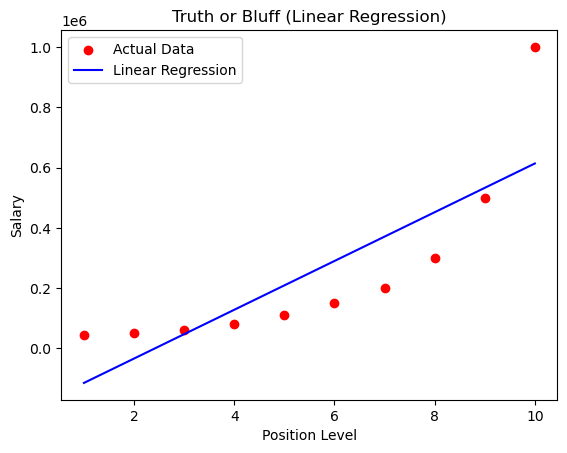

In [52]:
# Visualising the Linear Regression results
plt.scatter(X, y, color='red', label='Actual Data')
# Plots the actual data points in red

plt.plot(X, lin_reg.predict(X), color='blue', label='Linear Regression')
# Plots the predictions of the linear regression model as a blue line

plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()  # This will now display the legend with the correct labels
plt.show()

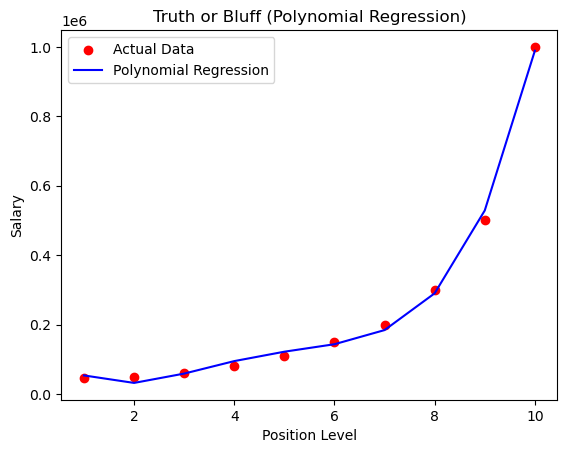

In [37]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color='red', label='Actual Data')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color='blue', label='Polynomial Regression')
# lin_reg_2.predict(): Uses the polynomial regression model to make predictions.
# plt.plot(): Visualizes the predicted polynomial curve.

plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()  # This will now display the legend with the correct labels
plt.show()

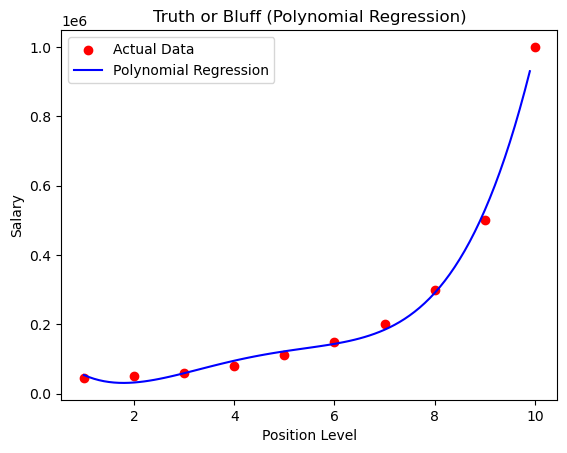

In [53]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X.flatten()), max(X.flatten()), 0.1)
# np.arange(min(X.flatten()), max(X.flatten()), 0.1):
# Generates a sequence of values starting from the smallest value in X to the largest value in X, incrementing by 0.1.
# This creates a dense grid of position levels, filling in the gaps between integer levels.
# .flatten():
# Flattens X into a 1D array if it’s multidimensional (to simplify calculations).
# Ensures compatibility when using min() and max().


X_grid = X_grid.reshape((len(X_grid), 1))
# Converts the generated 1D array X_grid back into a column vector so it matches the format expected by the regression model.



plt.scatter(X, y, color='red', label='Actual Data')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color='blue', label='Polynomial Regression')
# poly_reg.fit_transform(X_grid):
# Transforms the high-resolution X_grid values into polynomial features.
# Ensures that the model (lin_reg_2) can predict the corresponding salaries.
# lin_reg_2.predict(...):
# Predicts the salaries using the trained polynomial regression model.


plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()  # This will now display the legend with the correct labels
plt.show()

In [50]:
# Predicting a new result with Linear Regression
lin_reg.predict([[6.5]])

array([330378.78787879])

In [51]:
# Predicting a new result with Polynomial Regression
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265153])